In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score
)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [8]:
df=pd.read_csv("/content/Terrain.csv")
df.head()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Rainfall_3Day,Rainfall_7Day,Aspect,Elevation_m,NDVI_Index,Land_Use_Urban,...,Soil_Type_Silt,Soil_Type_Clay,Pore_Water_Pressure_kPa,Soil_Moisture_Content,Microseismic_Activity,Acoustic_Emission_dB,Soil_Strain,Soil_Temperature_C,TDR_Reflection_Index,Label
0,164.695364,59.783332,0.821479,0.107339,260.138381,79.297169,346.674199,733.776448,0.191948,1,...,1,0,133.943194,0.143732,0.290945,51.021834,0.005167,22.760036,0.799847,1
1,34.908086,15.153084,0.100428,0.960150,510.295547,247.923576,104.462371,467.708643,0.798321,1,...,0,1,90.788608,0.266484,0.651758,39.837282,0.003443,15.558373,1.181071,0
2,38.761727,13.135384,0.286526,0.833608,297.730266,194.327012,336.671287,1880.826807,0.479456,1,...,0,1,83.041150,0.129426,0.440714,68.902366,0.009999,6.205760,1.184971,0
3,32.199977,10.674734,0.255230,0.847569,231.640610,295.139546,300.742864,964.080336,-0.084314,1,...,1,0,196.089305,0.240198,0.794001,80.196960,0.003850,25.486545,0.677944,0
4,218.114032,48.839269,0.720071,0.018383,330.278249,301.288824,155.550502,165.699102,0.810869,0,...,1,1,106.778890,0.345724,0.009160,99.919786,0.003061,7.270319,0.882642,1


In [6]:
df.columns

Index(['Rainfall_mm', 'Slope_Angle', 'Soil_Saturation', 'Vegetation_Cover',
       'Rainfall_3Day', 'Rainfall_7Day', 'Aspect', 'Elevation_m', 'NDVI_Index',
       'Land_Use_Urban', 'Land_Use_Forest', 'Land_Use_Agriculture',
       'Earthquake_Activity', 'Proximity_to_Water', 'Distance_to_Road_m',
       'Temperature_C', 'Humidity_percent', 'Soil_pH', 'Clay_Content',
       'Sand_Content', 'Silt_Content', 'Soil_Erosion_Rate',
       'Historical_Landslide_Count', 'Soil_Type_Gravel', 'Soil_Type_Sand',
       'Soil_Type_Silt', 'Soil_Type_Clay', 'Pore_Water_Pressure_kPa',
       'Soil_Moisture_Content', 'Microseismic_Activity',
       'Acoustic_Emission_dB', 'Soil_Strain', 'Soil_Temperature_C',
       'TDR_Reflection_Index', 'Label'],
      dtype='object')

In [9]:
X = df.drop(columns=["Label", "Soil_Erosion_Rate"])
y_class = df["Label"]
y_reg = df["Soil_Erosion_Rate"]


In [10]:
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_class_train)


RandomForestClassifier(max_depth=15, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [13]:
y_class_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("\nClassification Report:\n")
print(classification_report(y_class_test, y_class_pred))


Accuracy: 0.9782057780030411

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       981
           1       0.98      0.97      0.98       992

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



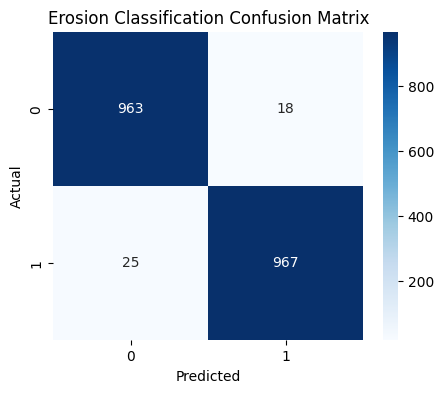

In [14]:
cm = confusion_matrix(y_class_test, y_class_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Erosion Classification Confusion Matrix")
plt.show()


In [15]:
reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

reg.fit(X_train, y_reg_train)


RandomForestRegressor(max_depth=15, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [18]:
y_reg_pred = reg.predict(X_test)

rmse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 206.26575531185307
R² Score: -0.0017482205147647534


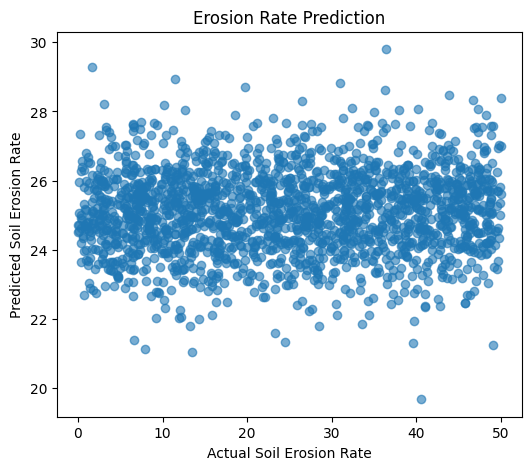

In [19]:
plt.figure(figsize=(6,5))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.xlabel("Actual Soil Erosion Rate")
plt.ylabel("Predicted Soil Erosion Rate")
plt.title("Erosion Rate Prediction")
plt.show()


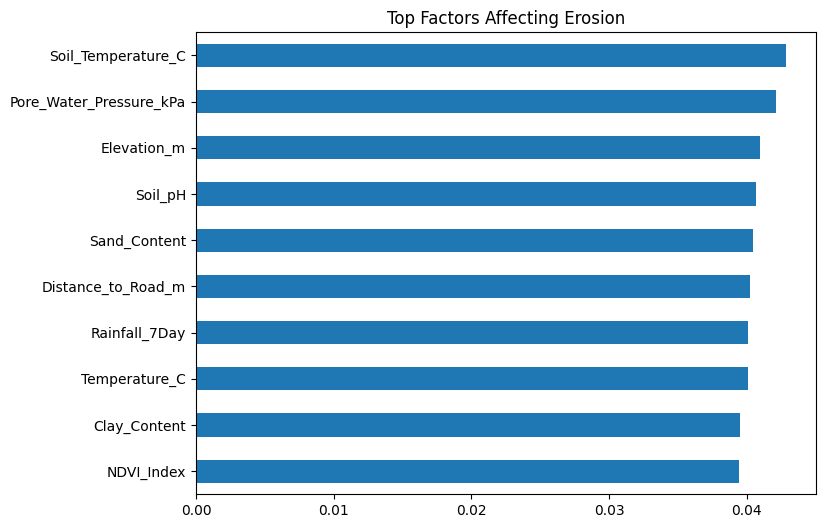

In [20]:
feature_importance = pd.Series(
    reg.feature_importances_,
    index=df.drop(columns=["Label", "Soil_Erosion_Rate"]).columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind="barh")
plt.title("Top Factors Affecting Erosion")
plt.gca().invert_yaxis()
plt.show()


In [21]:
!pip install xgboost


In [22]:
from xgboost import XGBClassifier, XGBRegressor


In [23]:
xgb_clf = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_clf.fit(X_train, y_class_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
y_pred_class = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_class_test, y_pred_class))
print(classification_report(y_class_test, y_pred_class))


Accuracy: 0.9782057780030411
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       981
           1       0.98      0.97      0.98       992

    accuracy                           0.98      1973
   macro avg       0.98      0.98      0.98      1973
weighted avg       0.98      0.98      0.98      1973



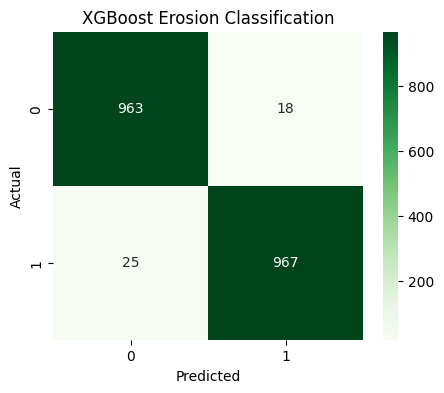

In [25]:
cm = confusion_matrix(y_class_test, y_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Erosion Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
xgb_reg = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_reg.fit(X_train, y_reg_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
y_pred_reg = xgb_reg.predict(X_test)

rmse = mean_squared_error(y_reg_test, y_pred_reg)
r2 = r2_score(y_reg_test, y_pred_reg)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 215.85263715451555
R² Score: -0.04830777574317713


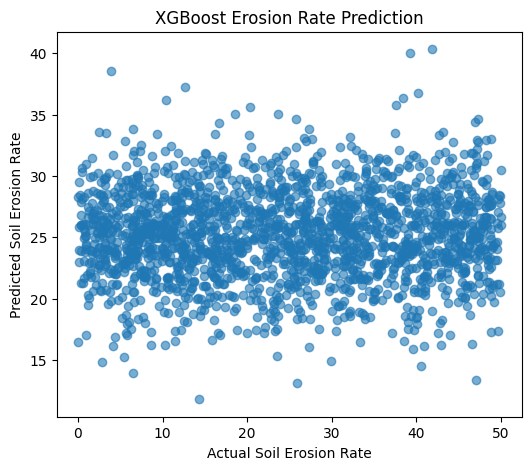

In [29]:
plt.figure(figsize=(6,5))
plt.scatter(y_reg_test, y_pred_reg, alpha=0.6)
plt.xlabel("Actual Soil Erosion Rate")
plt.ylabel("Predicted Soil Erosion Rate")
plt.title("XGBoost Erosion Rate Prediction")
plt.show()


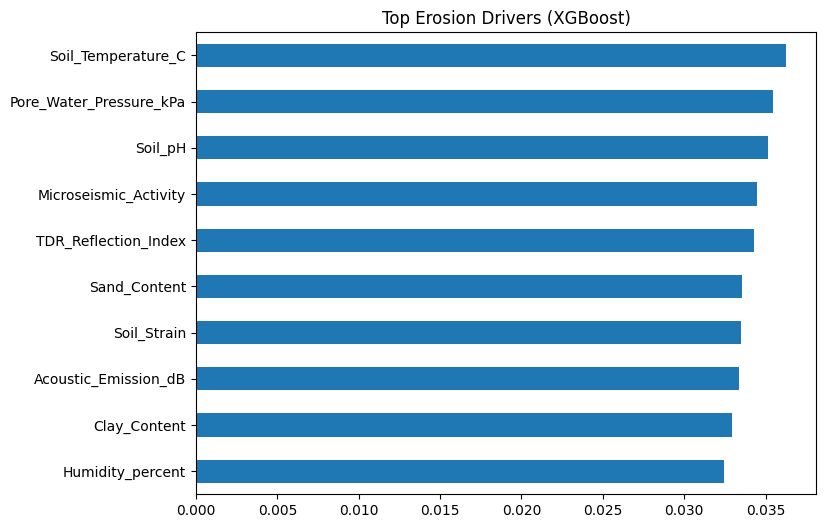

In [30]:
importance = xgb_reg.feature_importances_
features = df.drop(columns=["Label", "Soil_Erosion_Rate"]).columns

imp_df = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,6))
imp_df.head(10).plot(kind="barh")
plt.title("Top Erosion Drivers (XGBoost)")
plt.gca().invert_yaxis()
plt.show()
